In [2]:
from pathlib import Path

from matflow import load_workflow
from scipy.optimize import curve_fit
import numpy as np
import plotly.express as px
from plotly.graph_objects import FigureWidget
from plotly.colors import DEFAULT_PLOTLY_COLORS
from plotly.subplots import make_subplots

from cipher_parse import CIPHERInput, CIPHEROutput
import csv

In [3]:
import pickle


In [4]:
com_layout = {
    "width": 490,
    "height": 400,
    "legend": {
        "bgcolor": "rgb(230, 230, 230)",
        "font": {"size": 15},
    },
    "template": "simple_white",
    "margin": {"t": 10, "r": 10, "b": 40, "r": 40},
}
ax_com = dict(
    title_font_size=19, 
    tickfont_size=15,
    showline=True,
    linewidth=1,
    linecolor="black",
    mirror=True,
    showgrid=True,
)

In [5]:
t_f=[]
r_nucs_f=[]
r_subs_f=[]
gb_f=[]
for i in range(1, 11):
    filename = f'full_array{i}.npy'
    full_array = np.load(filename)
    t_f.append(full_array[0])
    r_nucs_f.append(full_array[1])
    r_subs_f.append(full_array[2])
    gb_f.append(full_array[4])

#full_array7 = np.load('full_array7.npy')
#t7=full_array7[0]
#r_nucs7=full_array7[1]
#r_subs7=full_array7[2]  

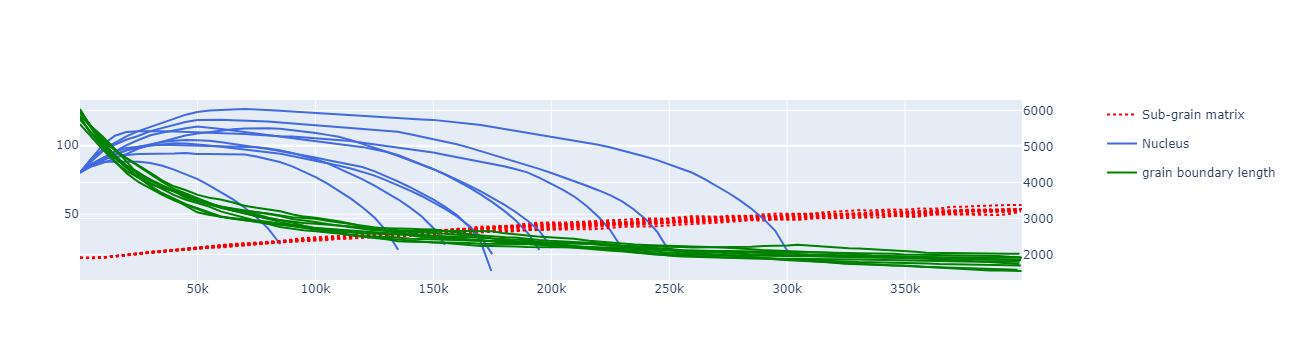

In [9]:
fig = FigureWidget()
fig = make_subplots(specs=[[{"secondary_y": True}]])
for idx, (t_i, r_n, r_s, gb) in enumerate(zip(t_f[0], r_nucs_f[0], r_subs_f[0], gb_f[0])):
    fig.add_scatter(x=t_i, y=r_s, name="Sub-grain matrix", legendgroup="sub-grain matrix", showlegend=idx == 0, line_dash="dot",line=dict(color="red"),secondary_y=False)
    fig.add_scatter(x=t_i, y=r_n, name="Nucleus", legendgroup="nucleus", showlegend=idx == 0,line=dict(color="royalblue"),secondary_y=False)
    fig.add_scatter(x=t_i, y=gb, name="grain boundary length", legendgroup="grain boundary length", showlegend=idx == 0,line=dict(color="green"), secondary_y=True)
for rn_idx in range(1,10):
    for idx, (t_i, r_n, r_s,gb) in enumerate(zip(t_f[rn_idx], r_nucs_f[rn_idx], r_subs_f[rn_idx],gb_f[rn_idx])):
        fig.add_scatter(x=t_i, y=r_s, name="sub grain matrix", legendgroup="sub-grain matrix",showlegend=False, line_dash="dot",line=dict(color="red"))
        fig.add_scatter(x=t_i, y=r_n, name="nucleus", legendgroup="nucleus",showlegend=False, line=dict(color="royalblue"))
        fig.add_scatter(x=t_i, y=gb, name="grain boundary length", legendgroup="grain boundary length", showlegend=False,line=dict(color="green"), secondary_y=True)
        
fig

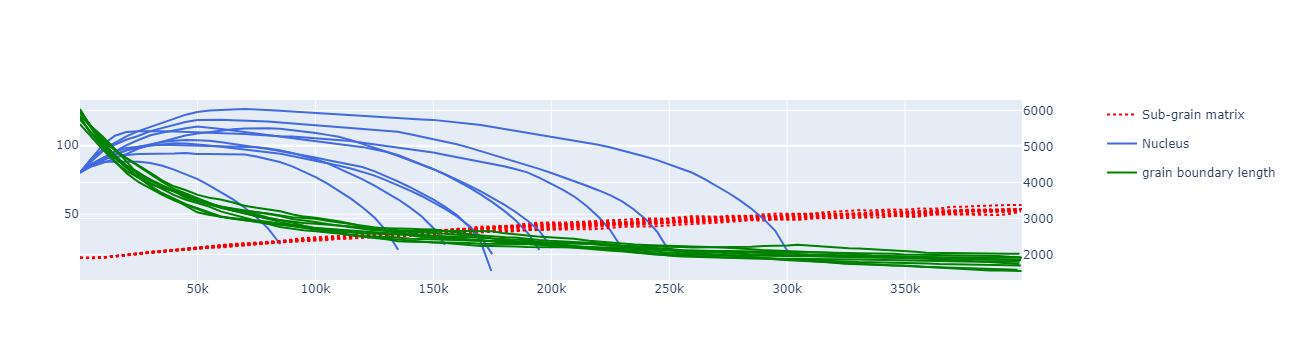

In [14]:
fig = FigureWidget()
fig = make_subplots(specs=[[{"secondary_y": True}]])
for idx, (t_i, r_n, r_s, gb) in enumerate(zip(t_f[0], r_nucs_f[0], r_subs_f[0], gb_f[0])):
    fig.add_scatter(x=t_i, y=r_s, name="Sub-grain matrix", legendgroup="sub-grain matrix", showlegend=idx == 0, line_dash="dot",line=dict(color="red"),secondary_y=False)
    fig.add_scatter(x=t_i, y=r_n, name="Nucleus", legendgroup="nucleus", showlegend=idx == 0,line=dict(color="royalblue"),secondary_y=False)
    fig.add_scatter(x=t_i, y=gb, name="grain boundary length", legendgroup="grain boundary length", showlegend=idx == 0,line=dict(color="green"), secondary_y=True)
for rn_idx in range(1,10):
    for idx, (t_i, r_n, r_s,gb) in enumerate(zip(t_f[rn_idx], r_nucs_f[rn_idx], r_subs_f[rn_idx],gb_f[rn_idx])):
        fig.add_scatter(x=t_i, y=r_s, name="sub grain matrix", legendgroup="sub-grain matrix",showlegend=False, line_dash="dot",line=dict(color="red"))
        fig.add_scatter(x=t_i, y=r_n, name="nucleus", legendgroup="nucleus",showlegend=False, line=dict(color="royalblue"))
        fig.add_scatter(x=t_i, y=gb, name="grain boundary length", legendgroup="grain boundary length", showlegend=False,line=dict(color="green"), secondary_y=True)
        
fig

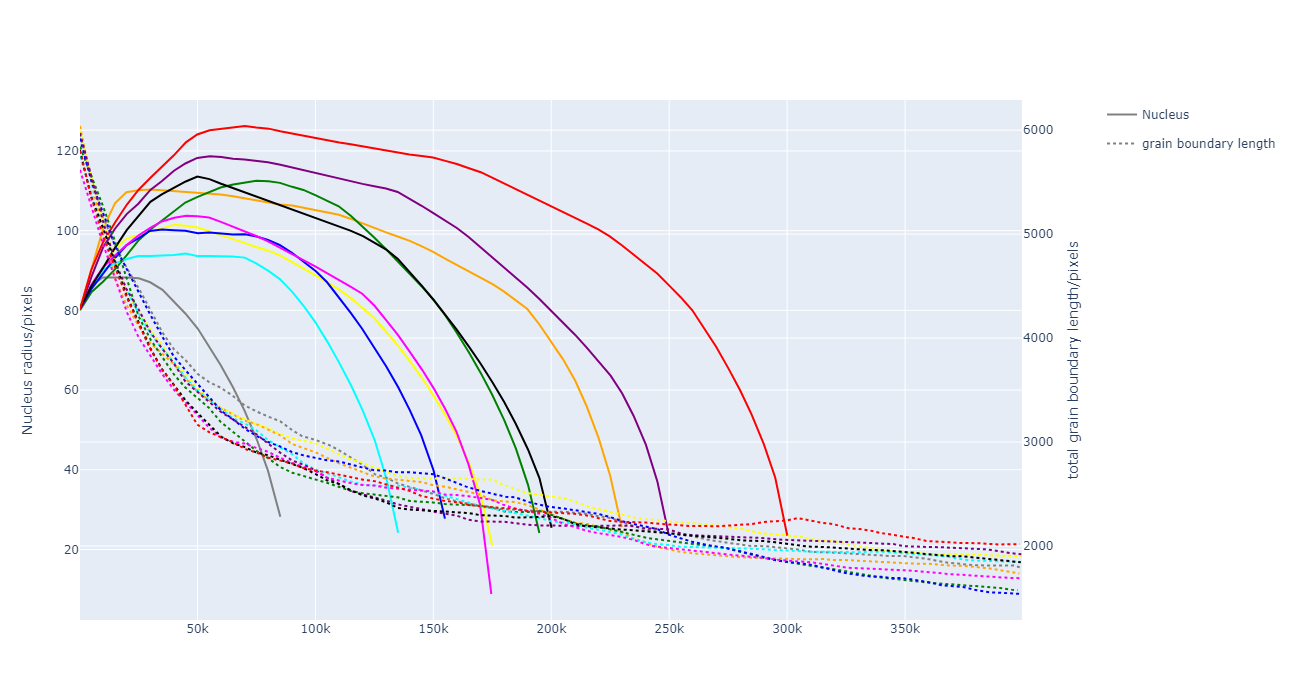

In [31]:
colour=['red','orange','yellow','green','cyan','blue','purple','magenta','black']

fig = FigureWidget()
fig = make_subplots(specs=[[{"secondary_y": True}]])
for idx, (t_i, r_n, gb) in enumerate(zip(t_f[0], r_nucs_f[0], gb_f[0])):
    fig.add_scatter(x=t_i, y=r_n, name="Nucleus", legendgroup="nucleus", showlegend=idx == 0,line=dict(color="grey"),secondary_y=False)
    fig.add_scatter(x=t_i, y=gb, name="grain boundary length", legendgroup="grain boundary length", showlegend=idx == 0,line_dash="dot",line=dict(color="grey"), secondary_y=True)
for rn_idx in range(1, 10):
    for idx, (t_i, r_n, gb) in enumerate(zip(t_f[rn_idx], r_nucs_f[rn_idx], gb_f[rn_idx])):
        fig.add_scatter(x=t_i, y=r_n, name="Nucleus", legendgroup="nucleus", showlegend=False, line=dict(color=colour[rn_idx % len(colour)]), secondary_y=False)
        fig.add_scatter(x=t_i, y=gb, name="Grain Boundary Length", legendgroup="grain boundary length", showlegend=False, line_dash="dot",line=dict(color=colour[rn_idx % len(colour)]), secondary_y=True)

fig.update_layout(
    yaxis=dict(title="Nucleus radius/pixels"),
    yaxis2=dict(title="total grain boundary length/pixels ", overlaying="y", side="right"),
    width=1300,  # Set the width to 800 pixels
    height=700  # Set the height to 400 pixels
)
fig       